# Machine Learning Report

Members: Maximilian Rønseth (StudentNr: 545464), Henrik Knudsen (StudentNr: 568825) and Martin Lőcsei (StudentNr: 545570)<br>
Groupname: [147] - dogwater

## 1. Introduction

We have decided upon implementing a multitude of regressors to try and as accurately as possible predict the fufture position of a handful of vessels on a 5-day time window. We decided upon these methods, as some of them gave us good results, while being moderately easy and swift to train and implement, and are easily tuned. Our work has included cleaning and interpreting the data, performing feature engineering, as well as of course implementing and training the actual model.

Let it be stated that our two submitted notebooks are for XGBoost only, as these are our best predictions (they have differen parameters etc.), but we have tried using multiple models, like XGBoost and LightGBM and RandomForest, Temporal Fusion Transformer and LSTM and CNN's.

## 2. Exploratory Data Analysis (EDA)

The general prupose of EDA is to understand the data we are given, so that we can make more informed decisions when it came to later work on the data set.

### 2.1 Data Overview and Intuition

The first thing we do when we load the data set, is to try and develop intuition about the problem at hand: since our task is prediction of vessel movement, the first thing we did was look at the covariates, and try and understand how each of them might be beneficial in future prediction. In our case, some of the covariates immediately come to mind, like speed above ground ("sog") and navstat; they seemed like they would be obviously beneficial to our work. Although, as we will later see, we ended up not using most of the covariates native to the data set. Obviously, the latitude and longitude are relevant covariates, but there exists a dichotomy here: one could either end up predicting latitude and longitude directly, or one could try and predict the difference in them. This influences the choice of covariates in the model, and we ended up going with the delta approach. 
Most of the covariates are quantative variables, which for the most part are easier to work with than categorical ones. We for instance see that sog and navstat are fairly heavily correlated, which makes sense as the sog is obviously zero when the boat is moored.

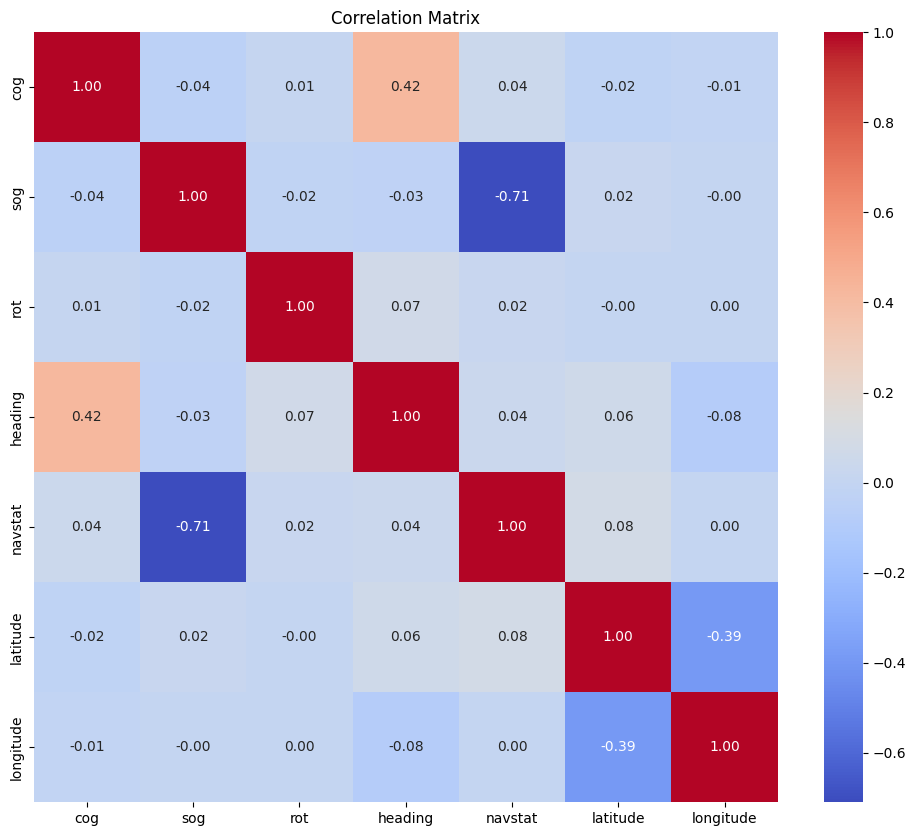

### 2.2 Feauture Cleanup 

As with any data set, we had to do cleanup on our data set. We did slightly different things depending on the model implemented, largely because we wanted to try different things, but there were some things we did for all approaches. We saw that multiple sog values were so high that they obviously had to be measurement errors. We tried bothsetting the sog to a sort of average, or to simply remove the rows with extreme values. Our best result came from simply removing the previous entry, and then reducing the speed to $26$, a sort of average which intuitively makes sense. Aside from this, we did not do exceptionally much feature cleanup, except for removing the ones we saw as perfunctory to our interest. 

## 3. Feature engineering

We ended up removing most covariates, and added some of our own. Firstly, we ended up predicting the difference in latitude and the difference in longitude, and used last known longitude as our covariate. We also ended up using delta_time (viz. the difference in seconds between two concurrent entries), which we though would help with large gaps in the data set. We also used a lagged version of the delta of latitude and longitude. We also created features that decomposed the speed vector on the sphere into one along the latitude and one along the latitude, using cog and sog, two features that are intuitively related. Lastly, since we are working on 5 day intervals, we created a covariate to see how long it has gone since the last 5 day observation for the vessel. Most of the other given columns were simply dropped.
We also notice that some of the navstat values are irregular, viz. there are som values of navstat that either show up very rarely, or they have no bearing on our prediction task. Thus we first ended up with a modified navstat, where the navstat simply gave value $0$ or $1$ depending on whether the vessel was in motion or not. We ended up dropping this in all our final models. 
We also tried including a bunch of covariates that at the time seemed handy, like, distance from last measurement, and the time it had been at sea. Testing show that these covariates either contributed little, or dragged down the performance of our models. 

For our final submission, the only features used, were last_lon, last_lat, and a lagged version of the average speed between concurrent points in the data; our rationale was that using lagged variables, and difference in times, would combine well together to help us with large time jumps, which was always what our models suffered the most with throughout the entire project.


 

## 4. Model work

### 4.1 Model Selecion and Training 

We ended up mainly predicting with three main models, linear regression, XGBoost and LightGBM, mainly because they are easy to implement, and they are good with tabular data; implementing LSTM and TFT was considerably more difficult, aswell as harder to interpret, so we ended up not using NN's. Linear regression obviously is not a complex enough model, and never gave us a score below $200$. Although linear regression is highly interpretable and actually gives us parameters that can be directly interpreted. Boosted tree models are non-parametric, so model interpretation must be done differently.


### 4.2 Model Parameters

Whenever we did parameter tuning, we actually reduced our score, so our choice of parameters for both the LightGBM and XGBoost model, were somewhat random (although based on educated guesses). This is peobably due to us not letting the tuning go on for long enough. Our $123$ result for XGBoost, came from using a learning rate of $0.05$, a max depth of $20$ and the amount of estimators to $3000$. Letting optuna run for $10$ hours over night weirdly enough reduced our score to sub $150$, which is why we ended up sticking to our gut-chosen parameters.



### 4.3 Model Intuition

We see that for our best XGBoost model, with our choice of parameters as shown above, that last_lon or the previous longitude value is the most important feature wrt. gain: this makes intuitive sense, as most of the vessel paths and movements happen along the longitude range. That is, there is much more movement from "side to side" than "up to down".






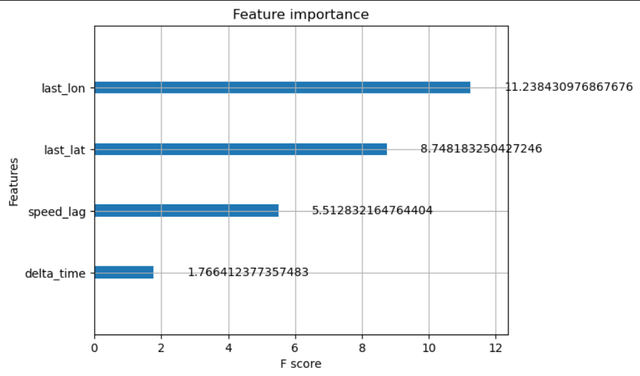

We also see that for a different setup of the training data (as mentioned above), we get a slightly different feature importance plot for our models. For this attempt, we used a weighted ensamble method, where we weighted RF with $0.3$, LightGBM with $0.2$ and XGBoost with $0.5$.

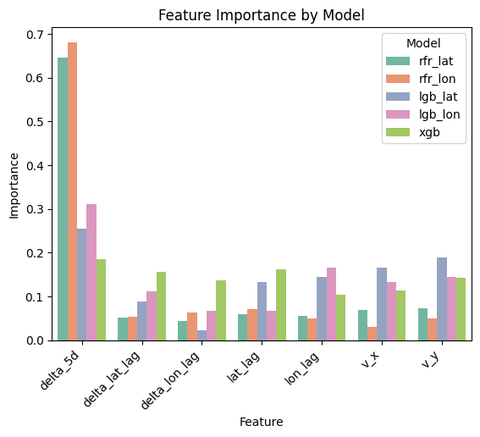

## 5 Results

Our best result came form using XGBoost, and iteratively predicting the covariates that are not in the test set, but which we used to train; another approach would of course be to create $5$ day windows, to give the tree model a sense of the temporal aspect of the time-series, but we were unfortunately not able to implement this in a satisfactory way.